# Spark SQL

In [ ]:
# Find path to PySpark.
import findspark
findspark.init()

In [2]:
# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

In [10]:
# Read `recent-grads.csv` in to an RDD.
path ='E:\\OneDrive\\Formation\\2018 - DataQuest\\Codes\\_Solutions-master'
file = 'recent-grads.csv'
file_path = '\\'.join([path,file])

f = sc.textFile(file_path)

## RDD Transformations

In [11]:
# Slice data in lines
data = f.map(lambda line: line.split('\n'))

In [6]:
data.take(5)

[['Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs'],
 ['1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,1849,270,1207,37,0.018380527,110000,95000,125000,1534,364,193'],
 ['2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50'],
 ['3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037383,3,648,558,133,340,16,0.024096386,73000,50000,105000,456,176,0'],
 ['4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313196,16,758,1069,150,692,40,0.050125313,70000,43000,80000,529,102,0']]

In [21]:
s = ['2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50']
for i in s:
    print(i)

2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50


In [22]:
s[0]

'2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50'

In [25]:
def Search_Job(line):
    id = line[0] 
    if 'ENGINEERING' in line[0]:
        yield id,'Good Job :'
        
good_jobs = data.flatMap(lambda x:Search_Job(x))  
    

In [26]:
good_jobs.take(5)

[('1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,1849,270,1207,37,0.018380527,110000,95000,125000,1534,364,193',
  'Good Job :'),
 ('2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50',
  'Good Job :'),
 ('3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037383,3,648,558,133,340,16,0.024096386,73000,50000,105000,456,176,0',
  'Good Job :'),
 ('4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313196,16,758,1069,150,692,40,0.050125313,70000,43000,80000,529,102,0',
  'Good Job :'),
 ('5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341630502,289,25694,23170,5180,16697,1672,0.061097712,65000,50000,75000,18314,4440,972',
  'Good Job :')]

In [27]:
def naval_job(line):
    if 'naval' in line[0].lower():
        return True
    else:
        return False
    
sea_jobs = data.filter(lambda x:naval_job(x))    


In [28]:
sea_jobs.take(5)

[['4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313196,16,758,1069,150,692,40,0.050125313,70000,43000,80000,529,102,0']]

## RDD Actions

In [29]:
data_count = data.count()
data_count

174

In [31]:
data_collect = data.collect()[:3]
data_collect

[['Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs'],
 ['1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,1849,270,1207,37,0.018380527,110000,95000,125000,1534,364,193'],
 ['2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50']]

## Transforming Dataset

In [43]:
def return_id(line):
    data = line[0]
    if data[0]!='R':
        raw_data = data.split(',')
        return int(raw_data[0])
    
data_ids = data.map(lambda line:return_id(line))    


In [45]:
list_data_ids = data_ids.collect()
list_data_ids[:5]

[None, 1, 2, 3, 4]

In [46]:
real_text = data_ids.filter(lambda x:x is not None)

list_data_ids = real_text.collect()
list_data_ids[:5]

[1, 2, 3, 4, 5]

## Spark DataFrames

In [62]:
import csv
with open(file_path,'r') as f:
    body=list(csv.reader(f))
            

In [65]:
header = body[:1][0]
body = body[1:]

In [47]:
# Import SQLContext
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

In [68]:
df = sqlCtx.read.csv(file_path,
                     header=True)

In [69]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [50]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)



In [70]:
df.show(5)

+----+----------+--------------------+-----+-----+-----+--------------+-----------+-----------+--------+---------+---------+--------------------+----------+-----------------+------+-----+------+------------+----------------+-------------+
|Rank|Major_code|               Major|Total|  Men|Women|Major_category| ShareWomen|Sample_size|Employed|Full_time|Part_time|Full_time_year_round|Unemployed|Unemployment_rate|Median|P25th| P75th|College_jobs|Non_college_jobs|Low_wage_jobs|
+----+----------+--------------------+-----+-----+-----+--------------+-----------+-----------+--------+---------+---------+--------------------+----------+-----------------+------+-----+------+------------+----------------+-------------+
|   1|      2419|PETROLEUM ENGINEE...| 2339| 2057|  282|   Engineering|0.120564344|         36|    1976|     1849|      270|                1207|        37|      0.018380527|110000|95000|125000|        1534|             364|          193|
|   2|      2416|MINING AND MINERA...|  756|

In [71]:
df.select('Major','Total','Men','Women').show()

+--------------------+-----+-----+-----+
|               Major|Total|  Men|Women|
+--------------------+-----+-----+-----+
|PETROLEUM ENGINEE...| 2339| 2057|  282|
|MINING AND MINERA...|  756|  679|   77|
|METALLURGICAL ENG...|  856|  725|  131|
|NAVAL ARCHITECTUR...| 1258| 1123|  135|
|CHEMICAL ENGINEERING|32260|21239|11021|
| NUCLEAR ENGINEERING| 2573| 2200|  373|
|   ACTUARIAL SCIENCE| 3777| 2110| 1667|
|ASTRONOMY AND AST...| 1792|  832|  960|
|MECHANICAL ENGINE...|91227|80320|10907|
|ELECTRICAL ENGINE...|81527|65511|16016|
|COMPUTER ENGINEERING|41542|33258| 8284|
|AEROSPACE ENGINEE...|15058|12953| 2105|
|BIOMEDICAL ENGINE...|14955| 8407| 6548|
|   MATERIALS SCIENCE| 4279| 2949| 1330|
|ENGINEERING MECHA...| 4321| 3526|  795|
|BIOLOGICAL ENGINE...| 8925| 6062| 2863|
|INDUSTRIAL AND MA...|18968|12453| 6515|
| GENERAL ENGINEERING|61152|45683|15469|
|ARCHITECTURAL ENG...| 2825| 1835|  990|
|     COURT REPORTING| 1148|  877|  271|
+--------------------+-----+-----+-----+
only showing top

In [77]:
Major_2000 = df[df['Total']>2000]
Major_2000.select('Major','Total','Men','Women').show(5)

+--------------------+-----+-----+-----+
|               Major|Total|  Men|Women|
+--------------------+-----+-----+-----+
|PETROLEUM ENGINEE...| 2339| 2057|  282|
|CHEMICAL ENGINEERING|32260|21239|11021|
| NUCLEAR ENGINEERING| 2573| 2200|  373|
|   ACTUARIAL SCIENCE| 3777| 2110| 1667|
|MECHANICAL ENGINE...|91227|80320|10907|
+--------------------+-----+-----+-----+
only showing top 5 rows



In [83]:
Female = df[df['Women']>=df['Men']].select('Major','Total','Men','Women').show(5)
Female

+--------------------+-----+----+-----+
|               Major|Total| Men|Women|
+--------------------+-----+----+-----+
|PETROLEUM ENGINEE...| 2339|2057|  282|
|MINING AND MINERA...|  756| 679|   77|
|NAVAL ARCHITECTUR...| 1258|1123|  135|
| NUCLEAR ENGINEERING| 2573|2200|  373|
|ASTRONOMY AND AST...| 1792| 832|  960|
+--------------------+-----+----+-----+
only showing top 5 rows



In [86]:
pandas_df = df.toPandas()

In [99]:
def Men_Women(line):
    if line['Women'] and line['Men']:
        if line['Women']>=line['Men']:
            return True
        else:
            return False
    else:
        return False

pandas_df = pandas_df.dropna()    
pandas_df['Egality']=pandas_df.apply(Men_Women,axis=1)

In [100]:
pandas_df_women = pandas_df.where(pandas_df['Egality']==True)
pandas_df_women.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Egality
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,...,1207,37,0.018380527,110000,95000,125000,1534,364,193,1.0
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,...,388,85,0.117241379,75000,55000,90000,350,257,50,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


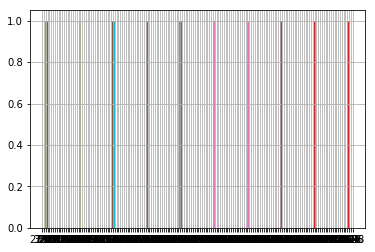

In [101]:
from matplotlib import pyplot as plt
%matplotlib inline

pandas_df['Total'].hist()
plt.show()

## Spark SQL

In [110]:
# Import SQLContext
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

In [111]:
df = sqlCtx.read.csv(file_path,
                     header=True)

In [112]:
df.registerTempTable('major_results')

tables = sqlCtx.tableNames()

print(tables)

['major_results']


In [105]:
query = "SELECT women FROM major_results"
sqlCtx.sql(query).show()

+-----+
|women|
+-----+
|  282|
|   77|
|  131|
|  135|
|11021|
|  373|
| 1667|
|  960|
|10907|
|16016|
| 8284|
| 2105|
| 6548|
| 1330|
|  795|
| 2863|
| 6515|
|15469|
|  990|
|  271|
+-----+
only showing top 20 rows



In [116]:
query = """SELECT men,women FROM major_results"""

df = sqlCtx.sql(query)

df.describe().show()

DataFrame[women: string]

In [ ]:
df1 = sqlCtx.read.csv(file_path,
                     header=True)

df2 = sqlCtx.read.csv(file_path,
                     header=True)

tables = sqlCtx.tableNames()


In [ ]:
df1.registerTempTable('major1')
df2.registerTempTable('major2')

query = """SELECT 
                t1.total,
                t2.total
            FROM 
                major1 as t1
            INNER JOIN 
                major2 as t2
                ON t1.major_code = t2.major_code
            """


In [ ]:
sqlCtx.sql(query).show()

In [ ]:
df1.registerTempTable('major1')
df2.registerTempTable('major2')

query = """SELECT 
                SUM(t1.total),
                SUM(t2.total)
            FROM 
                major1 as t1
            INNER JOIN 
                major2 as t2
                ON t1.major_code = t2.major_code
            """


In [ ]:
sqlCtx.sql(query).show()